# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

%matplotlib inline

UsageError: Line magic function `%` not found.


**Считываем обучающую выборку.**

In [5]:
train_df = pd.read_csv("../data/titanic_train.csv",
                       index_col='PassengerId')

In [6]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

/tmp/ipykernel_4236/341699152.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(train_df, range_padding=1.0, ax=fig)


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

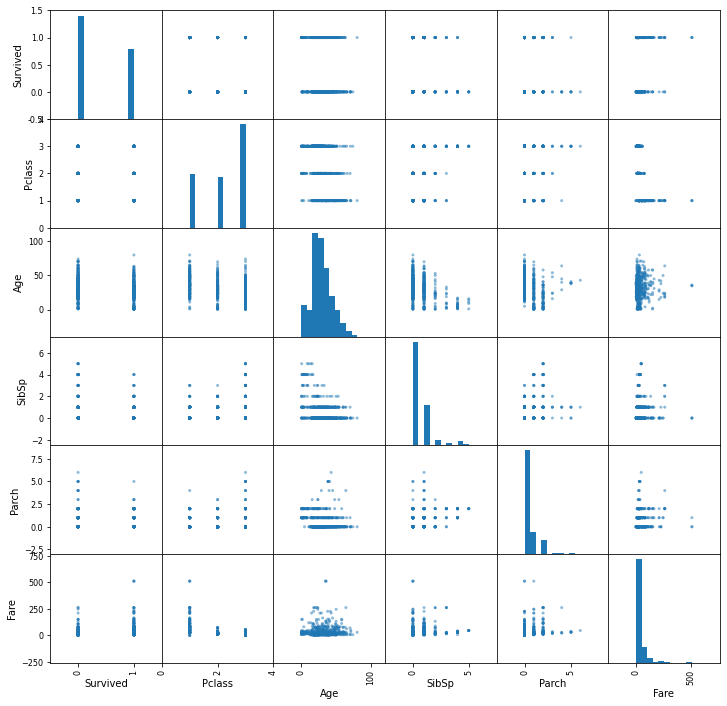

In [10]:
fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
pd.plotting.scatter_matrix(train_df, range_padding=1.0, ax=fig)

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

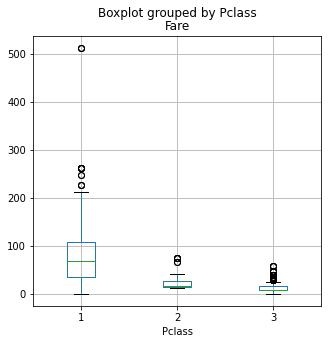

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
train_df.boxplot(column='Fare', by='Pclass', ax=ax)


**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

<AxesSubplot:title={'center':'Fare_no_out'}, xlabel='Pclass'>

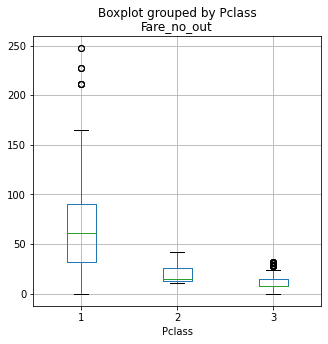

In [12]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - fare_pclass1.mean()).abs() <= 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - fare_pclass2.mean()).abs() <= 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - fare_pclass3.mean()).abs() <= 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
train_df.boxplot(column='Fare_no_out', by='Pclass', ax=ax)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<AxesSubplot:xlabel='Sex', ylabel='count'>

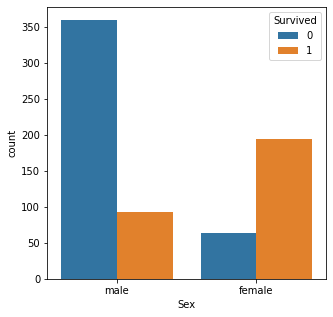

In [24]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
seaborn.countplot(x='Sex', data=train_df, hue='Survived', ax=ax)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

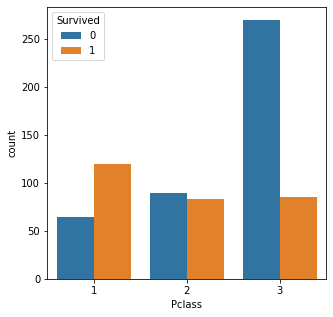

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
seaborn.countplot(x='Pclass', data=train_df, hue='Survived', ax=ax)


**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

<AxesSubplot:xlabel='Age_category', ylabel='count'>

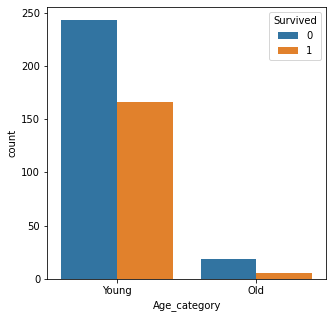

In [40]:

def age_category(age):
    """
    < 30 -> 1
    > 60  -> 2
    """
    if age <= 30:
        return 'Young'
    elif age >= 60:
        return 'Old'


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
train_df["Age_category"] = train_df["Age"].apply(age_category)
seaborn.countplot(x='Age_category', data=train_df, hue='Survived', ax=ax)